# Problem Statement:
Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

We will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models.

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv')
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
data.shape

(7043, 21)

In [41]:
data['TotalCharges'].value_counts()

          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6531, dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
data['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

Target variable having about 70:30 of data so we are not balancing the data

Male      3555
Female    3488
Name: gender, dtype: int64


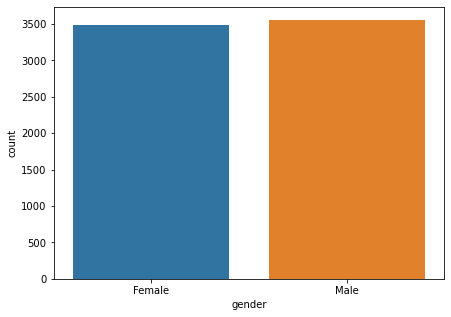

In [9]:
plt.figure(figsize=(7,5))
ax= sns.countplot(x='gender',data = data)
print(data['gender'].value_counts())

Customers(on the basis of gender) are almost equally present in the dataset

In [10]:
print(data['SeniorCitizen'].value_counts())

0    5901
1    1142
Name: SeniorCitizen, dtype: int64


There are more no of customers who are not senior citizens

No     3641
Yes    3402
Name: Partner, dtype: int64


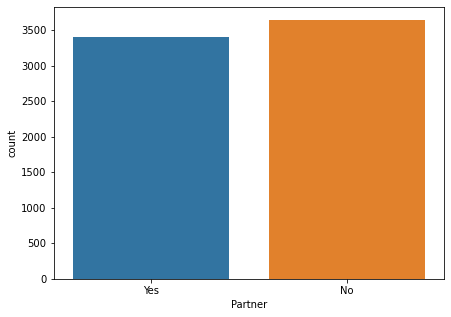

In [11]:
plt.figure(figsize=(7,5))
ax= sns.countplot(x='Partner',data = data)
print(data['Partner'].value_counts())

Approximately equal  no of Customers are eihter Partners or singles

In [12]:
print(data['Dependents'].value_counts())

No     4933
Yes    2110
Name: Dependents, dtype: int64


So the Maximun no of customers are Independents

<AxesSubplot:xlabel='SeniorCitizen', ylabel='tenure'>

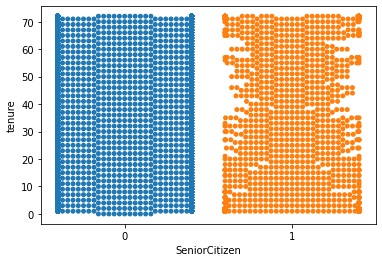

In [15]:
sns.swarmplot(x='SeniorCitizen',y='tenure',data = data)

If we show the graph the data points of the Senior citizen for the tenure is max in the ceustomer who are not Seniorciitzen

Yes    6361
No      682
Name: PhoneService, dtype: int64


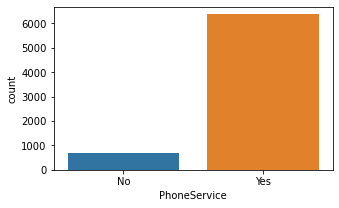

In [18]:
plt.figure(figsize=(5,3))
ax= sns.countplot(x='PhoneService',data = data)
print(data['PhoneService'].value_counts())

There are almost 90% of cutsomers who utilises the Phoneservices but there are very few cutomers who are not using any PhoneService

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


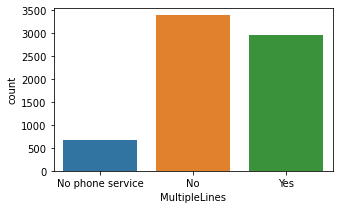

In [19]:
plt.figure(figsize=(5,3))
ax= sns.countplot(x='MultipleLines',data = data)
print(data['MultipleLines'].value_counts())

About 45% customers who uses MultipleLines in Phoneservice and many are those who are stick to one Phoneservice 

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


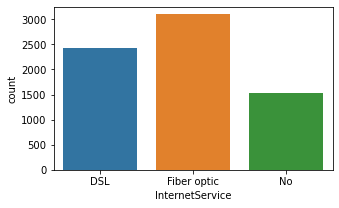

In [20]:
plt.figure(figsize=(5,3))
ax= sns.countplot(x='InternetService',data = data)
print(data['InternetService'].value_counts())

In this time too, there are alot of customers(20%) who are not using Internet services, But max customers who opt to choose Fibre Optic and rest DSL

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


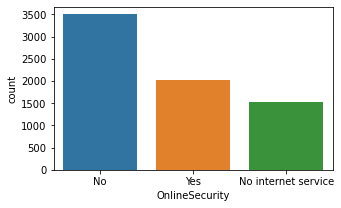

In [21]:
plt.figure(figsize=(5,3))
ax= sns.countplot(x='OnlineSecurity',data = data)
print(data['OnlineSecurity'].value_counts())

There are not more than 20% of customers who utilises Onlinesecurity

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64


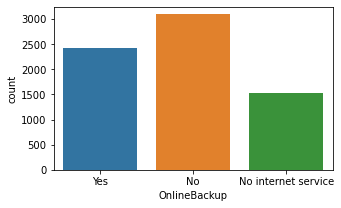

In [22]:
plt.figure(figsize=(5,3))
ax= sns.countplot(x='OnlineBackup',data = data)
print(data['OnlineBackup'].value_counts())

There are less no of customers who have Online Backup for there data otherwise rest of the customers dont have OnlineBackup

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64


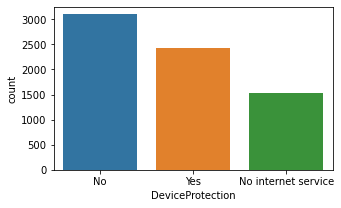

In [23]:
plt.figure(figsize=(5,3))
ax= sns.countplot(x='DeviceProtection',data = data)
print(data['DeviceProtection'].value_counts())

There are less no of customers who have DeviceProtection for there data otherwise rest of the customers dont have..

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64


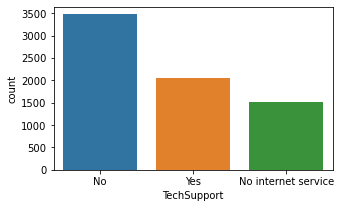

In [24]:
plt.figure(figsize=(5,3))
ax= sns.countplot(x='TechSupport',data = data)
print(data['TechSupport'].value_counts())

There are about 20%  of customers who use Techsuppot for theie queries otherwise rest of the customers dont use..

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64


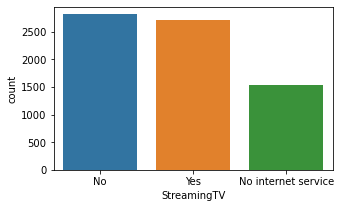

In [25]:
plt.figure(figsize=(5,3))
ax= sns.countplot(x='StreamingTV',data = data)
print(data['StreamingTV'].value_counts())

There are about 40% of customers who StreamTV  otherwise rest of the customers (approx 40%) who Have Internet service dont use..

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64


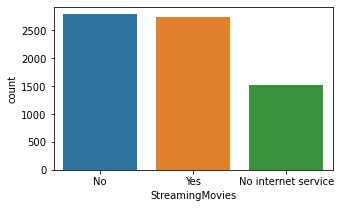

In [26]:
plt.figure(figsize=(5,3))
ax= sns.countplot(x='StreamingMovies',data = data)
print(data['StreamingMovies'].value_counts())

There are about 40% of customers who Stream Movies otherwise rest of the customers (approx 40%) who Have Internet service dont use..

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64


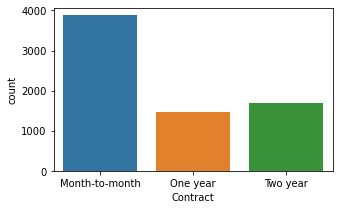

In [27]:
plt.figure(figsize=(5,3))
ax= sns.countplot(x='Contract',data = data)
print(data['Contract'].value_counts())

There are Max no of customers(Approx 55%) who have the Month - to- Month Contract and about 30% have one and 2 year contact

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64


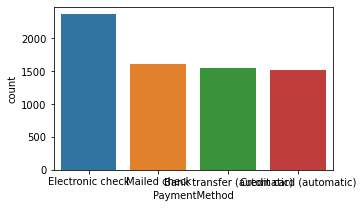

In [29]:
plt.figure(figsize=(5,3))
ax= sns.countplot(x='PaymentMethod',data = data)
print(data['PaymentMethod'].value_counts())

Max customers use Electronic check for doing payments

<AxesSubplot:xlabel='SeniorCitizen', ylabel='MonthlyCharges'>

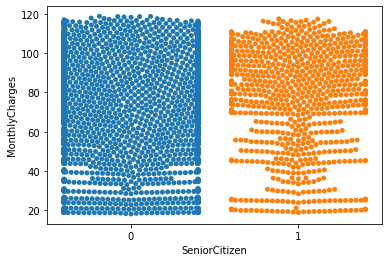

In [32]:
sns.swarmplot(x='SeniorCitizen',y='MonthlyCharges',data=data)

Clearly Monthly Charges for the person who are not Senoir citizen use more internet services and stream more TV

<AxesSubplot:xlabel='MultipleLines', ylabel='MonthlyCharges'>

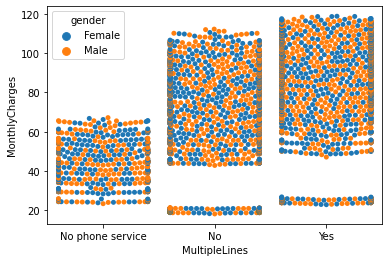

In [35]:
sns.swarmplot(x='MultipleLines',y='MonthlyCharges',hue='gender',data=data)

Males and Female have almost equal no of monthly bills but THE cutomers uses Multiple lines having high monthly chgarges and who not used phone service have very low monthly charges

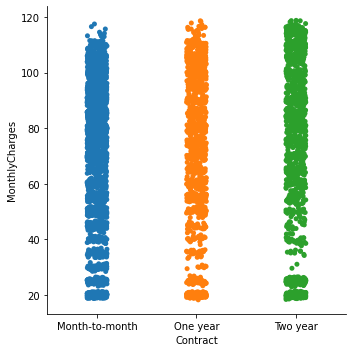

In [37]:
sns.catplot(x='Contract',y='MonthlyCharges',data=data)

THe customers who having contract month to month having bills monthly varying from 20 to 110 but who having more than month mostly have bills 40 to 120

In [38]:
data = data.drop('customerID',axis=1)
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [39]:
from sklearn.preprocessing import LabelEncoder

In [42]:
le = LabelEncoder()
var_mode = ['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','Churn']

for i in var_mode:
    data[i] = le.fit_transform(data[i])

In [43]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,Mailed check,56.95,1889.5,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,Electronic check,70.70,151.65,1


In [44]:
data['PaymentMethod'] = data['PaymentMethod'].replace({'Electronic check':0,'Mailed check':1,'Bank transfer (automatic)':2,'Credit card (automatic)':3})

In [45]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,0,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,1,56.95,1889.5,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,1,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,2,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,0,70.70,151.65,1


In [48]:
data['TotalCharges'].dtype

dtype('O')

In [54]:
data = data.drop("TotalCharges",axis=1)

In [56]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,7043.0,0.504756,0.500013,0.00,0.0,1.00,1.00,1.00
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
Partner,7043.0,0.483033,0.499748,0.00,0.0,0.00,1.00,1.00
Dependents,7043.0,0.299588,0.458110,0.00,0.0,0.00,1.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
PhoneService,7043.0,0.903166,0.295752,0.00,1.0,1.00,1.00,1.00
MultipleLines,7043.0,0.940508,0.948554,0.00,0.0,1.00,2.00,2.00
InternetService,7043.0,0.872923,0.737796,0.00,0.0,1.00,1.00,2.00
OnlineSecurity,7043.0,0.790004,0.859848,0.00,0.0,1.00,2.00,2.00
OnlineBackup,7043.0,0.906432,0.880162,0.00,0.0,1.00,2.00,2.00


In [57]:
data.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,-0.012057,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,-0.005209,-0.014569,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,-0.013632,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.093704,0.220173,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,0.153130,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,0.133115,0.096848,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,0.091015,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,0.123844,-0.113890,-0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,0.370876,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,0.340305,0.247900,-0.352229
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,0.024105,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004070,0.247398,0.011942
MultipleLines,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,0.117327,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,0.038603,0.433576,0.038037
InternetService,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,0.036138,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.008124,-0.323260,-0.047291
OnlineSecurity,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,0.227956,-0.053878,-0.289309
OnlineBackup,-0.012057,-0.013632,0.153130,0.091015,0.370876,0.024105,0.117327,0.036138,0.185126,1.000000,0.187757,0.195748,0.147186,0.136722,0.280980,-0.013370,0.159106,0.119777,-0.195525


<AxesSubplot:>

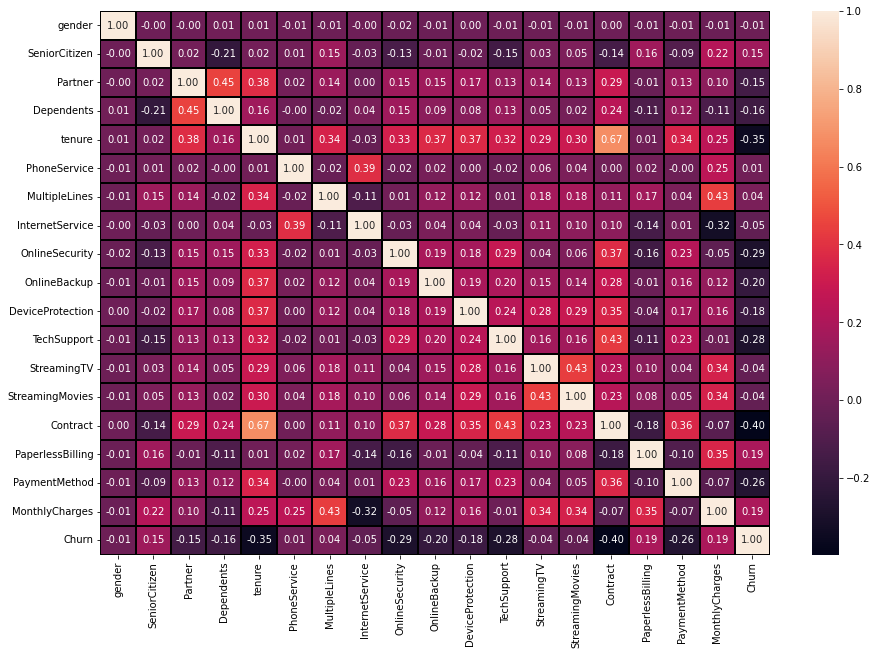

In [58]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot = True, linewidth = 0.1,linecolor='black',fmt='0.2f')

Tenure and contract are correlated 

Contract is mostly negatively correlated with the churn

In [60]:
data['MonthlyCharges'].skew()

-0.22052443394398033

SO we are not checking the outliers and skewness in this bcz all are categorical data except one Monthly charges and there might be some outliers but it is a bills and it varies from customer to customer so we are not checking the outliers

# we are ready to build the model as our data is good

In [62]:
# seprating the columns into features and target

x= data.drop("Churn",axis=1)
y= data["Churn"]

In [63]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [64]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_scaled= sc.fit_transform(x)

In [65]:
x_scaled.shape[1]

18

In [66]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif["features"] = x.columns

vif

,vif,features
0,1.001370,gender
1,1.150353,SeniorCitizen
2,1.460543,Partner
3,1.382512,Dependents
4,2.688257,tenure
5,1.625930,PhoneService
6,1.391522,MultipleLines
7,1.829249,InternetService
8,1.251850,OnlineSecurity
9,1.186587,OnlineBackup


but the vif value is less thsn 5 so we there is no multicollinearity present sowe are rready to build or model to predict

In [67]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
from sklearn.metrics import accuracy_score,confusion_matrix, roc_curve, roc_auc_score,classification_report
from sklearn.model_selection import train_test_split

In [68]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.25)

In [69]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
pred_lr=lr.predict(x_test)
print("Accuracy",accuracy_score(y_test,pred_lr)*100)
print('-------------------')
print('===================')
print('-------------------')
print(confusion_matrix(y_test,pred_lr))
print(classification_report(y_test,pred_lr))

Accuracy 79.50028392958546
-------------------
-------------------
[[1139  148]
 [ 213  261]]
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1287
           1       0.64      0.55      0.59       474

    accuracy                           0.80      1761
   macro avg       0.74      0.72      0.73      1761
weighted avg       0.79      0.80      0.79      1761



In [70]:
Test_accuracy = accuracy_score(y_test,pred_lr)

In [71]:
from sklearn.model_selection import cross_val_score

In [73]:
scr_lr = cross_val_score(lr,x,y,cv=5)
print("Cross Validation Score of logistic regression model is :- ",scr_lr.mean())

Cross Validation Score of logistic regression model is :-  0.8020735208723144


In [74]:
# now we trying with Decision tree classifier 

In [75]:
from sklearn.tree import DecisionTreeClassifier

In [76]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
pred_dt=dt.predict(x_test)
print("Accuracy",accuracy_score(y_test,pred_dt)*100)
print('-------------------------')
print(confusion_matrix(y_test,pred_dt))
print(classification_report(y_test,pred_dt))

Accuracy 73.14026121521863
-------------------------
[[1050  237]
 [ 236  238]]
              precision    recall  f1-score   support

           0       0.82      0.82      0.82      1287
           1       0.50      0.50      0.50       474

    accuracy                           0.73      1761
   macro avg       0.66      0.66      0.66      1761
weighted avg       0.73      0.73      0.73      1761



In [77]:
scr_dt = cross_val_score(dt,x,y,cv=5)
print("Cross Validation Score of Decision TREE model is :-",scr_dt.mean())

Cross Validation Score of Decision TREE model is :- 0.727671543325376


In [78]:
# now check with random forest classifier

In [79]:
from sklearn.ensemble import RandomForestClassifier

In [80]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
pred_rf=rf.predict(x_test)
print("Accuracy",accuracy_score(y_test,pred_rf)*100)
print('=======================================')
print(confusion_matrix(y_test,pred_rf))
print(classification_report(y_test,pred_rf))

Accuracy 78.08063600227145
[[1148  139]
 [ 247  227]]
              precision    recall  f1-score   support

           0       0.82      0.89      0.86      1287
           1       0.62      0.48      0.54       474

    accuracy                           0.78      1761
   macro avg       0.72      0.69      0.70      1761
weighted avg       0.77      0.78      0.77      1761



In [81]:
scr_rf = cross_val_score(rf,x,y,cv=5)
print("Cross Validation Score of RANDOM FOREST model is :-",scr_rf.mean())

Cross Validation Score of RANDOM FOREST model is :- 0.7857462578230854


In [82]:
# now with SVC algo

In [83]:
from sklearn.svm import SVC

sv = SVC()
sv.fit(x_train,y_train)

pred_sv=sv.predict(x_test)
print("Accuracy",accuracy_score(y_test,pred_sv)*100)

print('=========================================')
print(confusion_matrix(y_test,pred_sv))
print(classification_report(y_test,pred_sv))

Accuracy 78.19420783645657
[[1182  105]
 [ 279  195]]
              precision    recall  f1-score   support

           0       0.81      0.92      0.86      1287
           1       0.65      0.41      0.50       474

    accuracy                           0.78      1761
   macro avg       0.73      0.66      0.68      1761
weighted avg       0.77      0.78      0.76      1761



In [84]:
scr = cross_val_score(sv,x,y,cv=5)
print("Cross Validation Score of SVC model is :-",scr.mean())

Cross Validation Score of SVC model is :- 0.7908566681721401


In [85]:
# now with Knn

In [86]:
from sklearn.neighbors import KNeighborsClassifier

In [87]:
kn = KNeighborsClassifier()
kn.fit(x_train,y_train)
pred_kn=kn.predict(x_test)
print("Accuracy",accuracy_score(y_test,pred_kn)*100)
print('=======================================')
print(confusion_matrix(y_test,pred_kn))
print(classification_report(y_test,pred_kn))

Accuracy 76.26348665530949
[[1090  197]
 [ 221  253]]
              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1287
           1       0.56      0.53      0.55       474

    accuracy                           0.76      1761
   macro avg       0.70      0.69      0.69      1761
weighted avg       0.76      0.76      0.76      1761



In [88]:
knn = cross_val_score(kn,x,y,cv=5)
print("Cross Validation Score of Knn model is :-",knn.mean())

Cross Validation Score of Knn model is :- 0.7712630653590554


# so the difference between the cross val score and the accuracy score is  min for the logisticRegression SO WE USED THIS algo
and the testing accuracy is grt than others


# BUT BEFORE USED HYPERPARAMETER TUNING WITH GRIDSEARCHCV

In [89]:
from sklearn.model_selection import GridSearchCV

In [91]:
parameters = {"C":[1,5,10,20],'penalty':['l1','l2']}

clf = GridSearchCV(lr,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'C': 5, 'penalty': 'l2'}


In [92]:
lr = LogisticRegression(C = 5,penalty = 'l2')

In [93]:
lr.fit(x_train,y_train)

LogisticRegression(C=5)

In [95]:
y_preds = lr.predict(x_test)

In [96]:
cfm = confusion_matrix(y_test,y_preds)
cfm

array([[1139,  148],
       [ 215,  259]], dtype=int64)

In [97]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1287
           1       0.64      0.55      0.59       474

    accuracy                           0.79      1761
   macro avg       0.74      0.72      0.73      1761
weighted avg       0.79      0.79      0.79      1761



In [98]:
print("ACCURACY",accuracy_score(y_test,y_preds))

ACCURACY 0.7938671209540034


In [99]:
# ROC CURVE 

fpr,tpr,thresholds = roc_curve(y_test,y_pred)

In [100]:
print('THRESHOLDS=',thresholds)
print('True positive rate=',tpr)
print('FAlse positive rate=',fpr)


THRESHOLDS= [2 1 0]
True positive rate= [0.        0.5464135 1.       ]
FAlse positive rate= [0.         0.11499611 1.        ]


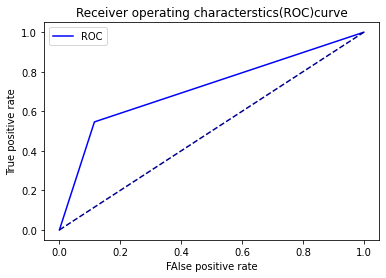

In [101]:
plt.plot(fpr,tpr,color = 'blue',label='ROC')
plt.plot([0,1],[0,1],color = 'darkblue',linestyle='--')
plt.xlabel('FAlse positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver operating characterstics(ROC)curve')
plt.legend()
plt.show()

In [102]:
# lets chk area it is covering(AUC)
auc_score = roc_auc_score(y_test,y_preds)
print(auc_score)

0.7157086935567949


In [103]:
# so after tuning, its accuracy is almost equal  so we used our LR model to predict

In [104]:
# saving the model for later prediction
import pickle

In [105]:
filename = 'CUSTOMER CHURN.pickle'
pickle.dump(lr,open(filename,'wb'))

# HENCE MY MODEL IS COMPLETE